## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [51]:
from collections import defaultdict
from functools import wraps
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
price = defaultdict(int)

In [52]:
for i,p in enumerate(original_price):
    price[i+1] = p

In [53]:
price[11]

35

In [177]:
already_computed = {}

In [178]:
def memo(f):
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in already_computed:
            result = already_computed[arg]
        else:
            result = f(arg)
            already_computed[arg] = result
        return result
    return _wrap

In [63]:
@memo
def r1(n):
    return max([price[n]] + [r1(i) + r1(n-i) for i in range(1,n)])

In [156]:
r1(19)

57

In [187]:
solution = {}

In [192]:
from functools import lru_cache
@lru_cache(maxsize=2**10)
def r2(n):
    max_price,max_split = max(
        [(price[n],0)] + [(r2(i) + r2(n-i), i) for i in range(1,n)], key=lambda x:x[0]
    )
    solution[n] = (n - max_split,max_split)
    return max_price

In [205]:
r2(23)

71

In [206]:
print(already_computed)

{1: 1, 2: 5, 3: 8, 4: 10, 5: 13, 6: 17, 7: 18, 8: 22}


In [207]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1)}

In [208]:
def parse_solution(n):
    left,right = solution[n]
    if right == 0: return [left]
    return parse_solution(left)+parse_solution(right)

In [210]:
parse_solution(23)

[11, 11, 1]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.
在第二次作业中已经实现

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [1]:
solution2 = {}

In [2]:
from functools import lru_cache
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution2[(string1, string2)] = operation 
    
    return min_distance

In [3]:
edit_distance('ABCDE', 'ABCCEF')

2

In [4]:
solution2

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [5]:
def stop_edit(string1, string2): return string1 == string2


# now we look for solutions in the "solution" dictionary

def parse_solution(string1, string2, solution_dic):
    
    parsed_solutions = [] 
    
    while not stop_edit(string1, string2):
        operation = solution_dic[(string1, string2)] # "查表" 过程
        
        if 'SUB' in operation:
            string1, string2 = string1[:-1], string2[:-1] 
            # if substitution, both forward and compare
        elif operation == '':
            string1, string2 = string1[:-1], string2[:-1]
            # if no edits, both forward and compare
        elif 'DEL' in operation:
            string1, string2 = string1[:-1], string2 
            # delete tail of string1 and then compare
        elif 'ADD' in operation:
            string1, string2 = string1, string2[:-1] 
            # delete tail of string2 and then compare
        
        parsed_solutions.append(operation)
    
    return parsed_solutions

In [6]:
edit_distance('BEIJING', 'TIANJIN')

5

In [7]:
solution2

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F',
 ('B', 'T'): 'SUB B => T',
 ('B', 'TI'): 'ADD I',
 ('B', 'TIA'): 'ADD A',
 ('B', 'TIAN'): 'ADD N',
 ('B', 'TIANJ'): 'ADD J',
 ('B', 'TIANJI'): 'ADD I',
 ('B', 'TIANJIN'): 'ADD N',
 ('BE', 'T'): 'DEL E',
 ('BE', 'TI'): 'S

In [8]:
parse_solution("BEIJING","TIANJIN",solution2)

['DEL G', '', '', '', 'ADD N', 'ADD A', '', 'DEL E', 'SUB B => T']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:找到函数变化的趋势，更快的逼近最优结果

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:对多元函数的参数求∂偏导数，把求得的各个参数的偏导数以向量的形式写出来，就是梯度,梯度的方向就是函数在给定点变化最快的方向，下降就是减小最快的方向


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:可以捕获好的变化趋势，并一直朝好的方向靠近

4. Using the simple words to describe: What's the machine leanring.¶

Ans:根据已有数据，计算出某件事情的决策方法

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

动态规划适用于有重复子问题和最优子结构的情况，将重复的计算变成更快的查表；搜索是对对象的查找，涉及不同的搜索方式

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

动态规划是一种解决特定问题的数学方法，并不是针对某种具体情况，所以没有固定的input来用来训练出一个function来解决具体问题

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

背包问题，旅行商问题，Fibonacci数列

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

拼写纠正，联想输入，相似内容推荐

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

最优子结构：一个最优化策略的子策略总是最优的
无后效性：对于某个给定的阶段状态，它以前各阶段的状态无法直接影响它未来的决策，而只能通过当前的这个状态。
重复子问题：解决问题的每一步都包含之前步骤中已经处理过的问题

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

动态规划将原来具有指数级时间复杂度的搜索算法改进成了具有多项式时间复杂度的算法，键在于解决冗余，这是动态规划算法的根本目的。动态规划实质上是一种以空间换时间的技术，它在实现的过程中，不得不存储产生过程中的各种状态，所以它的空间复杂度要大于其它的算法。

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [4]:
import random
import matplotlib.pylab as plt

In [178]:
latitudes = [random.randint(-100, 100) for _ in range(11)]
longitude = [random.randint(-100, 100) for _ in range(11)]

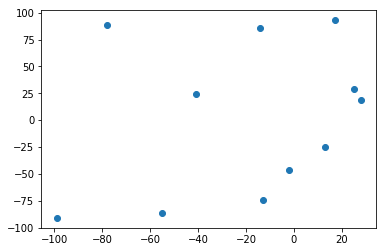

In [179]:
plt.scatter(latitudes, longitude)

In [180]:
print(list(zip(latitudes,longitude)))

[(-13, -74), (-2, -46), (17, 93), (-78, 89), (25, 29), (28, 19), (-55, -86), (-99, -91), (13, -25), (-14, 86), (-41, 24)]


In [181]:
import math
def distance(point_a,point_b):
    x_a,y_a = point_a
    x_b,y_b = point_b
    return math.sqrt((x_a-x_a)**2+(y_a-y_b)**2)

In [182]:
points = list(zip(latitudes,longitude))
distance_matrix=[]
distance_matrix=[[distance(a,b) for a in points]for b in points]

In [183]:
print(type(distance_matrix),len(distance_matrix))

<class 'list'> 11


In [184]:
print(distance_matrix)

[[0.0, 28.0, 167.0, 163.0, 103.0, 93.0, 12.0, 17.0, 49.0, 160.0, 98.0], [28.0, 0.0, 139.0, 135.0, 75.0, 65.0, 40.0, 45.0, 21.0, 132.0, 70.0], [167.0, 139.0, 0.0, 4.0, 64.0, 74.0, 179.0, 184.0, 118.0, 7.0, 69.0], [163.0, 135.0, 4.0, 0.0, 60.0, 70.0, 175.0, 180.0, 114.0, 3.0, 65.0], [103.0, 75.0, 64.0, 60.0, 0.0, 10.0, 115.0, 120.0, 54.0, 57.0, 5.0], [93.0, 65.0, 74.0, 70.0, 10.0, 0.0, 105.0, 110.0, 44.0, 67.0, 5.0], [12.0, 40.0, 179.0, 175.0, 115.0, 105.0, 0.0, 5.0, 61.0, 172.0, 110.0], [17.0, 45.0, 184.0, 180.0, 120.0, 110.0, 5.0, 0.0, 66.0, 177.0, 115.0], [49.0, 21.0, 118.0, 114.0, 54.0, 44.0, 61.0, 66.0, 0.0, 111.0, 49.0], [160.0, 132.0, 7.0, 3.0, 57.0, 67.0, 172.0, 177.0, 111.0, 0.0, 62.0], [98.0, 70.0, 69.0, 65.0, 5.0, 5.0, 110.0, 115.0, 49.0, 62.0, 0.0]]


In [185]:
import random
start = random.choice(points)
points_set = set(points)
points_set.remove(start)
solution = []

In [186]:
from functools import lru_cache

class Solution:   #X为距离矩阵
    def __init__(self,X,start_node):
        self.X = X
        self.start_node = start_node
        self.array = [[0]*(2**len(self.X)) for i in range(len(self.X))]#记录处于x节点，未经历M个节点时，矩阵储存x的下一步是M中哪个节点
    def transfer(self,sets):
        su = 0
        for s in sets:
            su = su + 2**s # 二进制转换
        return su
    
    def tsp(self):
        s = self.start_node
        num = len(self.X)
        cities = [i for i in range(num)]
        cities.pop(cities.index(s))  #从集合中去掉起始点，形成未访问节点集合
        node = s
        cities = tuple(cities)
        return self.solve(node,cities) 
    
    @lru_cache(maxsize=2**40)  #设置缓存加快运行速度
    def solve(self,node,future_sets):
        if len(future_sets) == 0:    #递归终止条件，所有节点都访问完毕，返回最后节点和初始节点的距离
            return self.X[node][self.start_node]
        d = 0        
        distance = []
        for i in range(len(future_sets)): #遍历所有未访问节点
            s_i = future_sets[i]      
            copy = future_sets[:]      #为每次递归新建一个未访问节点列表
            copy = list(copy)
            copy.pop(i)                #去掉起始节点，形成未访问节点集合
            copy = tuple(copy)         #变成tuple，变成hashable，才能使用lru_cache装饰器
            distance.append(self.X[node][s_i] + self.solve(s_i,copy))       #将每种可能放入列表
        d = min(distance)      
        next_one = future_sets[distance.index(d)]        #通过最短路径找回next_node，并生成下一步节点的矩阵array
        c = self.transfer(future_sets)
        self.array[node][c] = next_one
        return d
    
    #参考自https://blog.csdn.net/yg838457845/article/details/81127697

min path distance: 368.0
0 ---> 1
1 ---> 2
2 ---> 3
3 ---> 9
9 ---> 4
4 ---> 10
10 ---> 5
5 ---> 8
8 ---> 6
6 ---> 7
7 ---> 0


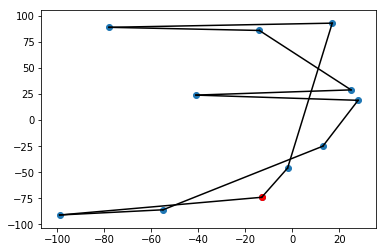

In [187]:
D = distance_matrix
S = Solution(D,0)
print("min path distance:",S.tsp())
lists = [i for i in range(len(S.X))]
start = S.start_node
while len(lists) > 0:
    lists.pop(lists.index(start))
    m = S.transfer(lists)
    next_node = S.array[start][m]
    print(start,"--->" ,next_node)
    plt.plot([points[start][0],points[next_node][0]],[points[start][1],points[next_node][1]],color='k')
    start = next_node
plt.scatter(latitudes, longitude)
plt.scatter([latitudes[0]],[longitude[0]],color='r')

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

思路：

把点的集合分成k个不为空的子集，将初始点p加入到每个子集中，对每一个子集做一次tsp算法，计算每个子集最短路径，然后对k个子集最短路径求和；

最后比较所有子集拆分的情况中计算的最短路径和，哪个更短，则求解出k辆车情况下的最短路径

In [188]:
def div_set(s,p,k): 
    '''
    参考https://bbs.csdn.net/topics/390281735中lijinlin_love关于将一个集合拆分成两个的方法，拓展出拆分成k个子集的方法
    为了后面方便使用返回的结果，又将起点p分别加入子集中
    s为点的index序列，并非点坐标，点坐标存在points中
    '''
    s.pop(s.index(p))
    n = len(s)
    subset_all = []
    for x in range(k**n):
        s1 = []
        s2 = []
        s3 = []
        for i in range(n):
            ki = k**i
            if(x//ki)%k == 0:
                s1.append(s[i])
            elif(x//ki)%k == 1:
                s2.append(s[i])
            else:
                s3.append(s[i])
        if s1 and s2 and s3:
            s1.append(p)
            s2.append(p)
            s3.append(p)
            subset = set((tuple(s1),tuple(s2),tuple(s3)))
            if subset not in subset_all:
                subset_all.append(subset)
    return subset_all

# 假设集合为 ｛a,b,c,d,e,f,g,h｝
# 0 0 0 0 0 0 0 1 
# a b c d e f g h  => 表示划分为 ｛a,b,c,d,e,f,g｝｛h｝
# 如此以来 问题就简化为从1 -> 2^(N-1) 依次判断每个数字的2进制位是0 还是1 是1就累加  

In [189]:
def get_dis_matrix(s): #根据序列求对应点的距离矩阵
    '''
    s为点的index序列，并非点坐标，点坐标存在points中
    '''
    n = len(s)
    matrix = [[distance(points[i],points[j]) for i in s]for j in s]
    return matrix

In [190]:
def get_tsp_path(s,p):
    '''
    根据序列s和起点p生成tsp路线，将上面生成路线图的语句放进一个函数中，
    方便后面调用.
    s为点的index序列，并非点坐标，点坐标存在points中
    '''
    path = []
    matrix = get_dis_matrix(s)
    S = Solution(matrix,p)
    result = S.tsp()
    lists = [i for i in range(len(matrix))]
    start = p
    while len(lists) > 0:
        lists.pop(lists.index(start))
        m = S.transfer(lists)
        next_node = S.array[start][m]
        path.append((s[start],s[next_node]))   #start nex_node为顺序序列的标号值，需要当成索引取出给定序列s中的值
        start = next_node
    return result,path  

In [174]:
color = [ 'black',
 'blue',
 'blueviolet',
 'brown',
 'darkblue',
 'darkred',
 'darkviolet',
 'deeppink',
 'firebrick', 
 'gold',
 'gray',
 'green',
 'lime',
 'limegreen',
 'pink',
 'purple',
 'red',
 'violet',
 'yellow',]

In [194]:
def k_tsp(s,p,k): #集合s起始点为p，k辆车的tsp问题
    subset_all = div_set(s,p,k)   #把s拆分成k个子集，将起始点p加到每个子集中
    get_tsp_path_result_list = []
    sum_res = 0
    all_sum_res = []
    for subsets in subset_all:   #遍历所有子集拆分的可能，每种可能包含k个子集
        for subset in subsets:   # 遍历k个子集，每个子集都包含起点p
            list_set = list(subset)
            result,path = get_tsp_path(list_set,p)  #得到每个子集的最短路径
            get_tsp_path_result_list.append([result,path])   #保存计算结果
            sum_res += result      #这种子集拆分情况中的最短路径值之和
        all_sum_res.append(sum_res) #保存所有子集拆分情况的最短路径和
    best_path_dis = min(all_sum_res)
    best_path_index = all_sum_res.index(best_path_dis)  #根据最短路径值找到这种情况的索引
    for i in range(k):                                #每个最短路径对应k个子集合的路径情况
        [sub_result,sub_path] = get_tsp_path_result_list[best_path_index*k+i]
        select_color = random.choice(color)            #方便在图中以不同颜色区别不同线路
        print('color:',select_color)
        for start,next_node in sub_path:
            print(start,"--->" ,next_node)
            plt.plot([points[start][0],points[next_node][0]],[points[start][1],points[next_node][1]],color=select_color)  
        print('==========')
    plt.scatter(latitudes, longitude)
    plt.scatter([latitudes[p]],[longitude[p]],color='r')                 

In [ ]:
s=[i for i in range(len(points))]
p = 0

In [200]:
k = 4

color: blueviolet
2 ---> 0
0 ---> 2
color: gold
1 ---> 0
0 ---> 1
color: purple
3 ---> 4
4 ---> 5
5 ---> 6
6 ---> 7
7 ---> 0
0 ---> 8
8 ---> 10
10 ---> 9
9 ---> 3
color: lime
3 ---> 0
0 ---> 3


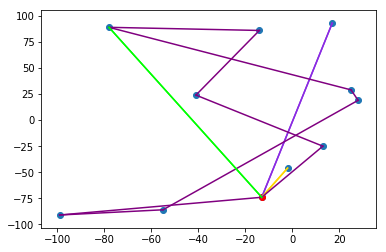

In [198]:
k_tsp(s,p,k)

color: lime
2 ---> 0
0 ---> 2
color: pink
1 ---> 0
0 ---> 1
color: darkred
3 ---> 4
4 ---> 5
5 ---> 6
6 ---> 7
7 ---> 0
0 ---> 8
8 ---> 10
10 ---> 9
9 ---> 3


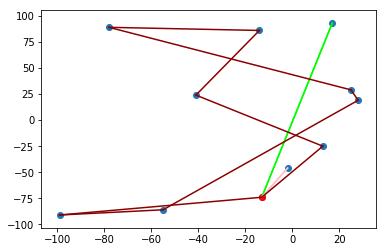

In [207]:
s=[i for i in range(len(points))]
p = 0
k=3
k_tsp(s,p,k)

#前面两个子集总是只包括起点在内的两个点，不知道是否有问题，k=5时时间太长没算出来

shuro